<a href="https://colab.research.google.com/github/ernesc/masters_thesis_2022/blob/main/CNN_LSTM_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis Valve

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#imports
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Activation
import tensorflow as tf
plt.style.use("ggplot")
from ipywidgets.widgets import interact, Layout

In [ ]:
def extract_data(filename, dataframe):
    
    import pandas as pd
    
    df_filename = pd.read_csv(filename,";")

    df_filename_lukket2 = pd.DataFrame()
    df_filename_lukket2 = df_filename_lukket2.append(df_filename[df_filename["Data Source"].str.contains("LUKKET")])
    df_filename_lukket = pd.DataFrame()
    df_filename_lukket = df_filename_lukket.append(df_filename_lukket2[df_filename_lukket2["Value"].str.contains("|".join(["On", "Off"]))])
    df_filename_lukket = df_filename_lukket.rename(columns={"Data Source": "data_source_lukket", 
                                          "Time": "time_lukket", 
                                          "Value": "value_lukket"})
    df_filename_lukket["time_lukket"] = pd.to_datetime(df_filename_lukket["time_lukket"])
    
    
    df_filename_apen1 = pd.DataFrame()
    df_filename_apen1 = df_filename_apen1.append(df_filename[df_filename["Data Source"].str.contains("APEN")])
    df_filename_apen = pd.DataFrame()
    df_filename_apen = df_filename_apen.append(df_filename_apen1[df_filename_apen1["Value"].str.contains("|".join(["On", "Off"]))])
    df_filename_apen = df_filename_apen.rename(columns={"Data Source": "data_source_apen", 
                                      "Time": "time_apen", 
                                      "Value": "value_apen"})
    df_filename_apen["time_apen"] = pd.to_datetime(df_filename_apen["time_apen"])
    
    df_filename_lukket.reset_index(inplace = True)
    df_filename_apen.reset_index(inplace=True)
    df_filename_lukket = df_filename_lukket.drop(columns="index")
    df_filename_apen = df_filename_apen.drop(columns="index")
    
    df_filename_apen['interval'] = pd.to_datetime(df_filename_apen['time_apen'])
    df_filename_lukket['interval'] = pd.to_datetime(df_filename_lukket['time_lukket'])
    
    df_filename_apen.sort_values(by=['interval'])
    df_filename_lukket.sort_values(by=['interval'])
    
    dataframe = pd.merge_asof(df_filename_apen, df_filename_lukket, on='interval', direction="nearest")
    
    
    dataframe["time_diff"] = dataframe["time_apen"] - dataframe["time_lukket"]
    
    dataframe["time_diff_sec"] = dataframe["time_diff"].dt.total_seconds()
    
    dataframe = dataframe.drop(dataframe[dataframe["time_diff_sec"] == 0].index)
    
    return dataframe

In [ ]:

data_2012_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2012.csv", 2012)
data_2013_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2013.csv", 2013)
data_2014_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2014.csv", 2014)
data_2015_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2015.csv", 2015)
data_2016_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2016.csv", 2016)
data_2017_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2017.csv", 2017)
data_2018_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2018.csv", 2018)
data_2019_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2019.csv", 2019)
data_2020_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2020.csv", 2020)
data_2021_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2021.csv", 2021)


frames = [data_2012_1, data_2013_1, data_2014_1, data_2015_1, data_2016_1, data_2017_1, data_2018_1, data_2019_1, data_2020_1, data_2021_1]

agg1 = pd.concat(frames)

data_2012_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2012.csv", 2012)
data_2013_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2013.csv", 2013)
data_2014_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2014.csv", 2014)
data_2015_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2015.csv", 2015)
data_2016_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2016.csv", 2016)
data_2017_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2017.csv", 2017)
data_2018_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2018.csv", 2018)
data_2019_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2019.csv", 2019)
data_2020_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2020.csv", 2020)
data_2021_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2021.csv", 2021)


frames = [data_2012_2, data_2013_2, data_2014_2, data_2015_2, data_2016_2, data_2017_2, data_2018_2, data_2019_2, data_2020_2, data_2021_2]

agg2 = pd.concat(frames)

data_2012_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2012.csv", 2012)
data_2013_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2013.csv", 2013)
data_2014_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2014.csv", 2014)
data_2015_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2015.csv", 2015)
data_2016_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2016.csv", 2016)
data_2017_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2017.csv", 2017)
data_2018_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2018.csv", 2018)
data_2019_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2019.csv", 2019)
data_2020_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2020.csv", 2020)
data_2021_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2021.csv", 2021)


frames = [data_2012_3, data_2013_3, data_2014_3, data_2015_3, data_2016_3, data_2017_3, data_2018_3, data_2019_3, data_2020_3, data_2021_3]

agg3 = pd.concat(frames)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: F

In [ ]:
agg1_close = agg1[agg1.time_diff_sec < 0]
agg1_open = agg1[agg1.time_diff_sec > 0]
agg1_open_v1 = agg1_open['time_diff_sec']
agg1_close_v1 = agg1_close['time_diff_sec']
agg1_open_v2 = agg1_open[['time_apen', 'time_diff_sec']]
agg1_open_v2 = agg1_open_v2.set_index('time_apen')

agg2_close = agg2[agg2.time_diff_sec < 0]
agg2_open = agg2[agg2.time_diff_sec > 0]
agg2_open_v1 = agg2_open['time_diff_sec']
agg2_close_v1 = agg2_close['time_diff_sec']
agg2_open_v2 = agg2_open[['time_apen', 'time_diff_sec']]
agg2_open_v2 = agg2_open_v2.set_index('time_apen')

agg3_close = agg3[agg3.time_diff_sec < 0]
agg3_open = agg3[agg3.time_diff_sec > 0]
agg3_open_v1 = agg3_open['time_diff_sec']
agg3_close_v1 = agg3_close['time_diff_sec']
agg3_open_v2 = agg3_open[['time_apen', 'time_diff_sec']]
agg3_open_v2 = agg3_open_v2.set_index('time_apen')
agg3_close_v2 = agg3_close[['time_lukket', 'time_diff_sec']]
agg3_close_v2 = agg3_close_v2.set_index('time_lukket')

In [ ]:
def remove_outliers_v1(data, cutoff):
    data_mean, data_std = np.mean(data), np.std(data)
    cut_off = data_std * cutoff
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Non-outlier obs: %d' % len(outliers_removed))
    
    return outliers

In [ ]:
dataset = agg1_close_v1
# validation data is going to be the last 60 cycles
last = 100

In [ ]:
outliers = remove_outliers_v1(dataset, 3)

Identified outliers: 4
Non-outlier obs: 348


In [ ]:
dataset = dataset[~dataset.isin(outliers)]

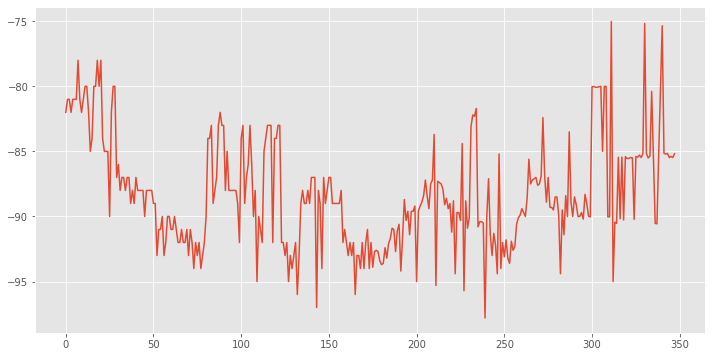

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(np.arange(0,len(dataset)),dataset)

In [ ]:
def sliding_window(data, window_size): 
  from numpy import array
  X, y = list(), list()
  for i in range(len(data)):
    # find the end of this pattern
    end_ix = i + window_size
    # check if we are beyond the sequence
    if end_ix > len(data)-1: 
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = data[i:end_ix], data[end_ix] 
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [ ]:
n_steps = 80
# split into samples
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
cp = ModelCheckpoint('model103/', save_best_only=True, monitor='val_root_mean_squared_error')
early_stopping = EarlyStopping(monitor='val_root_mean_squared_error', patience=100)

X, y = sliding_window(list(dataset)[:len(dataset)-last], n_steps)
X_val, y_val = sliding_window(list(agg3_close_v1)[len(dataset)-last:], n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 40
X = X.reshape((X.shape[0], n_seq, n_steps, n_features)) 
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=2, activation='relu'),
input_shape=(None, n_steps, n_features))) 
model.add(TimeDistributed(MaxPooling1D(pool_size=4))) 
model.add(TimeDistributed(Flatten())) 
model.add(LSTM(200, activation='relu')) 
model.add(Dense(120, activation='relu'))
model.add(Dense(1))
opt = Adam(learning_rate=.0001)
model.compile(optimizer=opt, loss='mae', metrics=[RootMeanSquaredError()])
# fit model


#history = model.fit(X, y, epochs=1000, , verbose=1, callbacks=[cp])
history = model.fit(X, y, epochs=1000, validation_split=.1, callbacks=[early_stopping,cp])

Epoch 1/1000
5/5 [==============================] - ETA: 0s - loss: 86.5865 - root_mean_squared_error: 86.7020INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 6s 884ms/step - loss: 86.5865 - root_mean_squared_error: 86.7020 - val_loss: 79.0131 - val_root_mean_squared_error: 79.1450
Epoch 2/1000
5/5 [==============================] - ETA: 0s - loss: 75.0089 - root_mean_squared_error: 75.1553INFO:tensorflow:Assets written to: model103/assets


INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 836ms/step - loss: 75.0089 - root_mean_squared_error: 75.1553 - val_loss: 64.6859 - val_root_mean_squared_error: 64.8490
Epoch 3/1000
5/5 [==============================] - ETA: 0s - loss: 58.0528 - root_mean_squared_error: 58.3948INFO:tensorflow:Assets written to: model103/assets


INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 6s 2s/step - loss: 58.0528 - root_mean_squared_error: 58.3948 - val_loss: 42.9341 - val_root_mean_squared_error: 43.1664
Epoch 4/1000
5/5 [==============================] - ETA: 0s - loss: 32.6667 - root_mean_squared_error: 33.9239INFO:tensorflow:Assets written to: model103/assets


INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 7s 2s/step - loss: 32.6667 - root_mean_squared_error: 33.9239 - val_loss: 10.2690 - val_root_mean_squared_error: 11.2094
Epoch 5/1000
5/5 [==============================] - 0s 62ms/step - loss: 7.7396 - root_mean_squared_error: 9.0759 - val_loss: 14.7677 - val_root_mean_squared_error: 15.4379
Epoch 6/1000
4/5 [=======================>......] - ETA: 0s - loss: 11.5643 - root_mean_squared_error: 12.0737INFO:tensorflow:Assets written to: model103/assets


INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 8s 2s/step - loss: 10.5974 - root_mean_squared_error: 11.3591 - val_loss: 5.3602 - val_root_mean_squared_error: 6.5582
Epoch 7/1000
5/5 [==============================] - 0s 66ms/step - loss: 4.2505 - root_mean_squared_error: 5.1707 - val_loss: 5.6790 - val_root_mean_squared_error: 6.6750
Epoch 8/1000
4/5 [=======================>......] - ETA: 0s - loss: 5.3639 - root_mean_squared_error: 6.2467INFO:tensorflow:Assets written to: model103/assets


INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 5s 1s/step - loss: 4.9649 - root_mean_squared_error: 5.8840 - val_loss: 3.6730 - val_root_mean_squared_error: 4.9534
Epoch 9/1000
5/5 [==============================] - 0s 68ms/step - loss: 3.4920 - root_mean_squared_error: 4.3147 - val_loss: 5.5596 - val_root_mean_squared_error: 6.7512
Epoch 10/1000
5/5 [==============================] - ETA: 0s - loss: 3.0081 - root_mean_squared_error: 3.6411INFO:tensorflow:Assets written to: model103/assets


INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 7s 2s/step - loss: 3.0081 - root_mean_squared_error: 3.6411 - val_loss: 3.9391 - val_root_mean_squared_error: 4.5059
Epoch 11/1000
5/5 [==============================] - ETA: 0s - loss: 3.3725 - root_mean_squared_error: 4.1550INFO:tensorflow:Assets written to: model103/assets


INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 6s 1s/step - loss: 3.3725 - root_mean_squared_error: 4.1550 - val_loss: 3.6013 - val_root_mean_squared_error: 4.4885
Epoch 12/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.7289 - root_mean_squared_error: 3.2593 - val_loss: 4.4668 - val_root_mean_squared_error: 5.7222
Epoch 13/1000
5/5 [==============================] - 0s 39ms/step - loss: 2.9071 - root_mean_squared_error: 3.5044 - val_loss: 3.5069 - val_root_mean_squared_error: 4.5481
Epoch 14/1000
5/5 [==============================] - 0s 34ms/step - loss: 2.7449 - root_mean_squared_error: 3.3826 - val_loss: 3.5412 - val_root_mean_squared_error: 4.5167
Epoch 15/1000
5/5 [==============================] - 0s 34ms/step - loss: 2.6052 - root_mean_squared_error: 3.1525 - val_loss: 3.9801 - val_root_mean_squared_error: 5.2582
Epoch 16/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.7561 - root_mean_squared_error: 3.3207 - val_loss: 3.4909 - val_root_mean_square

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 840ms/step - loss: 2.6661 - root_mean_squared_error: 3.2840 - val_loss: 3.7655 - val_root_mean_squared_error: 4.4660
Epoch 68/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.6918 - root_mean_squared_error: 3.3272 - val_loss: 3.6698 - val_root_mean_squared_error: 4.9418
Epoch 69/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.5747 - root_mean_squared_error: 3.1506 - val_loss: 3.5242 - val_root_mean_squared_error: 4.5431
Epoch 70/1000
5/5 [==============================] - 0s 39ms/step - loss: 2.5693 - root_mean_squared_error: 3.1422 - val_loss: 3.6303 - val_root_mean_squared_error: 4.8852
Epoch 71/1000
5/5 [==============================] - 0s 56ms/step - loss: 2.5938 - root_mean_squared_error: 3.1873 - val_loss: 3.6809 - val_root_mean_squared_error: 4.4698
Epoch 72/1000
5/5 [==============================] - 0s 68ms/step - loss: 2.7028 - root_mean_squared_error: 3.2742 - val_loss: 3.5693 - val_root_mean_squ

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 746ms/step - loss: 2.5207 - root_mean_squared_error: 3.1186 - val_loss: 3.6191 - val_root_mean_squared_error: 4.4630
Epoch 96/1000
5/5 [==============================] - 0s 39ms/step - loss: 2.5818 - root_mean_squared_error: 3.1611 - val_loss: 3.5852 - val_root_mean_squared_error: 4.8297
Epoch 97/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.5560 - root_mean_squared_error: 3.1284 - val_loss: 3.4773 - val_root_mean_squared_error: 4.6420
Epoch 98/1000
5/5 [==============================] - 0s 33ms/step - loss: 2.4868 - root_mean_squared_error: 3.0619 - val_loss: 3.6302 - val_root_mean_squared_error: 4.8936
Epoch 99/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.6347 - root_mean_squared_error: 3.1862 - val_loss: 3.4797 - val_root_mean_squared_error: 4.5444
Epoch 100/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.6082 - root_mean_squared_error: 3.1309 - val_loss: 3.4773 - val_root_mean_sq

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 5s 1s/step - loss: 2.4519 - root_mean_squared_error: 3.0262 - val_loss: 3.6183 - val_root_mean_squared_error: 4.4534
Epoch 107/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.6488 - root_mean_squared_error: 3.2080 - val_loss: 3.6179 - val_root_mean_squared_error: 4.8847
Epoch 108/1000
5/5 [==============================] - ETA: 0s - loss: 2.4639 - root_mean_squared_error: 3.0535INFO:tensorflow:Assets written to: model103/assets


INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 747ms/step - loss: 2.4639 - root_mean_squared_error: 3.0535 - val_loss: 3.6538 - val_root_mean_squared_error: 4.4436
Epoch 109/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.5672 - root_mean_squared_error: 3.1994 - val_loss: 3.8082 - val_root_mean_squared_error: 5.1005
Epoch 110/1000
5/5 [==============================] - ETA: 0s - loss: 2.5439 - root_mean_squared_error: 3.1094INFO:tensorflow:Assets written to: model103/assets


INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 845ms/step - loss: 2.5439 - root_mean_squared_error: 3.1094 - val_loss: 3.6516 - val_root_mean_squared_error: 4.4428
Epoch 111/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.6632 - root_mean_squared_error: 3.3139 - val_loss: 4.2531 - val_root_mean_squared_error: 5.5203
Epoch 112/1000
5/5 [==============================] - ETA: 0s - loss: 2.7541 - root_mean_squared_error: 3.3173INFO:tensorflow:Assets written to: model103/assets


INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 762ms/step - loss: 2.7541 - root_mean_squared_error: 3.3173 - val_loss: 3.7773 - val_root_mean_squared_error: 4.4368
Epoch 113/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.7438 - root_mean_squared_error: 3.3744 - val_loss: 4.0726 - val_root_mean_squared_error: 5.3588
Epoch 114/1000
5/5 [==============================] - 0s 34ms/step - loss: 2.7470 - root_mean_squared_error: 3.3834 - val_loss: 3.6331 - val_root_mean_squared_error: 4.4482
Epoch 115/1000
5/5 [==============================] - 0s 34ms/step - loss: 2.5710 - root_mean_squared_error: 3.1587 - val_loss: 3.4499 - val_root_mean_squared_error: 4.5720
Epoch 116/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.5710 - root_mean_squared_error: 3.1323 - val_loss: 3.6574 - val_root_mean_squared_error: 4.4438
Epoch 117/1000
5/5 [==============================] - 0s 41ms/step - loss: 2.5878 - root_mean_squared_error: 3.2455 - val_loss: 3.6763 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 841ms/step - loss: 2.5334 - root_mean_squared_error: 3.1482 - val_loss: 3.7768 - val_root_mean_squared_error: 4.4329
Epoch 128/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.6124 - root_mean_squared_error: 3.1758 - val_loss: 3.5073 - val_root_mean_squared_error: 4.7187
Epoch 129/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.5181 - root_mean_squared_error: 3.1093 - val_loss: 3.5322 - val_root_mean_squared_error: 4.7706
Epoch 130/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.6368 - root_mean_squared_error: 3.2264 - val_loss: 3.7930 - val_root_mean_squared_error: 4.4346
Epoch 131/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.8038 - root_mean_squared_error: 3.4599 - val_loss: 3.8333 - val_root_mean_squared_error: 5.1306
Epoch 132/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.5894 - root_mean_squared_error: 3.2081 - val_loss: 3.4996 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 758ms/step - loss: 2.5040 - root_mean_squared_error: 3.0749 - val_loss: 3.6518 - val_root_mean_squared_error: 4.4285
Epoch 140/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.4444 - root_mean_squared_error: 3.0515 - val_loss: 3.8480 - val_root_mean_squared_error: 5.1513
Epoch 141/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.6660 - root_mean_squared_error: 3.2655 - val_loss: 3.8120 - val_root_mean_squared_error: 4.4330
Epoch 142/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.6357 - root_mean_squared_error: 3.2570 - val_loss: 3.7090 - val_root_mean_squared_error: 5.0022
Epoch 143/1000
5/5 [==============================] - 0s 34ms/step - loss: 2.7708 - root_mean_squared_error: 3.4132 - val_loss: 3.5015 - val_root_mean_squared_error: 4.4860
Epoch 144/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.6283 - root_mean_squared_error: 3.2718 - val_loss: 3.4623 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 842ms/step - loss: 2.4985 - root_mean_squared_error: 3.1490 - val_loss: 3.7316 - val_root_mean_squared_error: 4.4255
Epoch 149/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.5605 - root_mean_squared_error: 3.1692 - val_loss: 3.5982 - val_root_mean_squared_error: 4.8776
Epoch 150/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.5222 - root_mean_squared_error: 3.1333 - val_loss: 3.7725 - val_root_mean_squared_error: 4.4277
Epoch 151/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.5175 - root_mean_squared_error: 3.1139 - val_loss: 3.5851 - val_root_mean_squared_error: 4.8623
Epoch 152/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.3974 - root_mean_squared_error: 2.9991 - val_loss: 3.6189 - val_root_mean_squared_error: 4.4346
Epoch 153/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.4969 - root_mean_squared_error: 3.1141 - val_loss: 3.4585 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 765ms/step - loss: 2.6494 - root_mean_squared_error: 3.3048 - val_loss: 3.7648 - val_root_mean_squared_error: 4.4240
Epoch 156/1000
5/5 [==============================] - 0s 40ms/step - loss: 2.6123 - root_mean_squared_error: 3.2213 - val_loss: 3.7193 - val_root_mean_squared_error: 5.0133
Epoch 157/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.4410 - root_mean_squared_error: 2.9960 - val_loss: 3.6197 - val_root_mean_squared_error: 4.4355
Epoch 158/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.5349 - root_mean_squared_error: 3.1966 - val_loss: 3.5914 - val_root_mean_squared_error: 4.8711
Epoch 159/1000
5/5 [==============================] - 0s 34ms/step - loss: 2.4582 - root_mean_squared_error: 3.0483 - val_loss: 3.4221 - val_root_mean_squared_error: 4.5583
Epoch 160/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.4452 - root_mean_squared_error: 3.0563 - val_loss: 3.6334 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 762ms/step - loss: 2.4099 - root_mean_squared_error: 3.0260 - val_loss: 3.6681 - val_root_mean_squared_error: 4.4149
Epoch 167/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.4562 - root_mean_squared_error: 3.1522 - val_loss: 3.7003 - val_root_mean_squared_error: 4.9972
Epoch 168/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.5704 - root_mean_squared_error: 3.1358 - val_loss: 3.4167 - val_root_mean_squared_error: 4.6001
Epoch 169/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.3481 - root_mean_squared_error: 2.9663 - val_loss: 3.4133 - val_root_mean_squared_error: 4.5468
Epoch 170/1000
5/5 [==============================] - 0s 34ms/step - loss: 2.4169 - root_mean_squared_error: 2.9943 - val_loss: 3.4088 - val_root_mean_squared_error: 4.5841
Epoch 171/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.4400 - root_mean_squared_error: 3.0737 - val_loss: 3.4296 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 857ms/step - loss: 2.5711 - root_mean_squared_error: 3.2299 - val_loss: 3.6325 - val_root_mean_squared_error: 4.4043
Epoch 203/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.3608 - root_mean_squared_error: 3.0292 - val_loss: 3.8112 - val_root_mean_squared_error: 4.4182
Epoch 204/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.7931 - root_mean_squared_error: 3.3663 - val_loss: 3.3787 - val_root_mean_squared_error: 4.5609
Epoch 205/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.3851 - root_mean_squared_error: 3.0080 - val_loss: 3.4679 - val_root_mean_squared_error: 4.4711
Epoch 206/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.3110 - root_mean_squared_error: 2.9636 - val_loss: 3.4244 - val_root_mean_squared_error: 4.4974
Epoch 207/1000
5/5 [==============================] - 0s 39ms/step - loss: 2.3250 - root_mean_squared_error: 2.9605 - val_loss: 3.6372 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 755ms/step - loss: 2.2297 - root_mean_squared_error: 2.8729 - val_loss: 3.6427 - val_root_mean_squared_error: 4.4001
Epoch 226/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.3091 - root_mean_squared_error: 2.9532 - val_loss: 3.5895 - val_root_mean_squared_error: 4.8806
Epoch 227/1000
5/5 [==============================] - 0s 83ms/step - loss: 2.3284 - root_mean_squared_error: 2.9401 - val_loss: 3.3868 - val_root_mean_squared_error: 4.5068
Epoch 228/1000
5/5 [==============================] - 0s 97ms/step - loss: 2.4390 - root_mean_squared_error: 3.0810 - val_loss: 3.7450 - val_root_mean_squared_error: 4.4009
Epoch 229/1000
5/5 [==============================] - 0s 71ms/step - loss: 2.3049 - root_mean_squared_error: 2.9682 - val_loss: 3.4706 - val_root_mean_squared_error: 4.7641
Epoch 230/1000
5/5 [==============================] - 0s 34ms/step - loss: 2.2757 - root_mean_squared_error: 2.9105 - val_loss: 3.3765 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 822ms/step - loss: 2.2822 - root_mean_squared_error: 2.9025 - val_loss: 3.6486 - val_root_mean_squared_error: 4.3952
Epoch 232/1000
5/5 [==============================] - 0s 39ms/step - loss: 2.3065 - root_mean_squared_error: 2.9671 - val_loss: 3.3464 - val_root_mean_squared_error: 4.5517
Epoch 233/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.2829 - root_mean_squared_error: 2.9308 - val_loss: 3.3666 - val_root_mean_squared_error: 4.5928
Epoch 234/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.2711 - root_mean_squared_error: 2.9434 - val_loss: 3.7522 - val_root_mean_squared_error: 4.4055
Epoch 235/1000
5/5 [==============================] - 0s 34ms/step - loss: 2.4068 - root_mean_squared_error: 2.9988 - val_loss: 3.3865 - val_root_mean_squared_error: 4.6343
Epoch 236/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.2128 - root_mean_squared_error: 2.8742 - val_loss: 3.6136 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 738ms/step - loss: 2.2978 - root_mean_squared_error: 2.9519 - val_loss: 3.5990 - val_root_mean_squared_error: 4.3918
Epoch 245/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.2847 - root_mean_squared_error: 2.9405 - val_loss: 3.4619 - val_root_mean_squared_error: 4.4381
Epoch 246/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.2645 - root_mean_squared_error: 2.9130 - val_loss: 3.5173 - val_root_mean_squared_error: 4.4125
Epoch 247/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.1969 - root_mean_squared_error: 2.8717 - val_loss: 3.5323 - val_root_mean_squared_error: 4.8287
Epoch 248/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.3023 - root_mean_squared_error: 2.9896 - val_loss: 3.4379 - val_root_mean_squared_error: 4.4510
Epoch 249/1000
5/5 [==============================] - 0s 40ms/step - loss: 2.2049 - root_mean_squared_error: 2.9210 - val_loss: 3.5205 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 845ms/step - loss: 2.1522 - root_mean_squared_error: 2.7956 - val_loss: 3.6344 - val_root_mean_squared_error: 4.3834
Epoch 309/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.3594 - root_mean_squared_error: 2.9630 - val_loss: 4.8266 - val_root_mean_squared_error: 6.0374
Epoch 310/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.7989 - root_mean_squared_error: 3.5559 - val_loss: 4.1115 - val_root_mean_squared_error: 4.6372
Epoch 311/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.5426 - root_mean_squared_error: 3.2265 - val_loss: 3.3986 - val_root_mean_squared_error: 4.6801
Epoch 312/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.6040 - root_mean_squared_error: 3.2625 - val_loss: 3.5101 - val_root_mean_squared_error: 4.8234
Epoch 313/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.4469 - root_mean_squared_error: 3.0610 - val_loss: 3.6453 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 771ms/step - loss: 2.1854 - root_mean_squared_error: 2.7990 - val_loss: 3.6366 - val_root_mean_squared_error: 4.3764
Epoch 323/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.2920 - root_mean_squared_error: 2.8951 - val_loss: 3.3829 - val_root_mean_squared_error: 4.7072
Epoch 324/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.2523 - root_mean_squared_error: 2.8749 - val_loss: 3.6586 - val_root_mean_squared_error: 4.9782
Epoch 325/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.1834 - root_mean_squared_error: 2.8456 - val_loss: 3.5625 - val_root_mean_squared_error: 4.3865
Epoch 326/1000
5/5 [==============================] - 0s 39ms/step - loss: 2.1333 - root_mean_squared_error: 2.7970 - val_loss: 3.3175 - val_root_mean_squared_error: 4.5564
Epoch 327/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.1914 - root_mean_squared_error: 2.8876 - val_loss: 3.4548 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 828ms/step - loss: 2.2344 - root_mean_squared_error: 2.8416 - val_loss: 3.4950 - val_root_mean_squared_error: 4.3680
Epoch 353/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.3255 - root_mean_squared_error: 2.9320 - val_loss: 3.4763 - val_root_mean_squared_error: 4.8044
Epoch 354/1000
5/5 [==============================] - 0s 42ms/step - loss: 2.2345 - root_mean_squared_error: 2.9152 - val_loss: 3.3028 - val_root_mean_squared_error: 4.5720
Epoch 355/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.0203 - root_mean_squared_error: 2.6668 - val_loss: 3.3240 - val_root_mean_squared_error: 4.6220
Epoch 356/1000
5/5 [==============================] - 0s 35ms/step - loss: 2.1273 - root_mean_squared_error: 2.8090 - val_loss: 3.4863 - val_root_mean_squared_error: 4.8096
Epoch 357/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.1173 - root_mean_squared_error: 2.7705 - val_loss: 3.2804 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 752ms/step - loss: 2.1168 - root_mean_squared_error: 2.7420 - val_loss: 3.5671 - val_root_mean_squared_error: 4.3575
Epoch 375/1000
5/5 [==============================] - 0s 40ms/step - loss: 2.2688 - root_mean_squared_error: 2.9128 - val_loss: 3.5694 - val_root_mean_squared_error: 4.8734
Epoch 376/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.1479 - root_mean_squared_error: 2.7784 - val_loss: 3.3084 - val_root_mean_squared_error: 4.4816
Epoch 377/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.3270 - root_mean_squared_error: 2.9127 - val_loss: 4.0629 - val_root_mean_squared_error: 4.6142
Epoch 378/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.7405 - root_mean_squared_error: 3.3677 - val_loss: 4.1009 - val_root_mean_squared_error: 5.3502
Epoch 379/1000
5/5 [==============================] - ETA: 0s - loss: 2.9313 - root_mean_squared_error: 3.5449INFO:tensorflow:Assets written to: mode

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 764ms/step - loss: 2.9313 - root_mean_squared_error: 3.5449 - val_loss: 3.4810 - val_root_mean_squared_error: 4.3459
Epoch 380/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.8300 - root_mean_squared_error: 3.4830 - val_loss: 3.4731 - val_root_mean_squared_error: 4.3688
Epoch 381/1000
5/5 [==============================] - 0s 40ms/step - loss: 2.7691 - root_mean_squared_error: 3.4476 - val_loss: 3.8982 - val_root_mean_squared_error: 5.2101
Epoch 382/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.4584 - root_mean_squared_error: 3.1628 - val_loss: 3.8749 - val_root_mean_squared_error: 4.4382
Epoch 383/1000
5/5 [==============================] - 0s 39ms/step - loss: 2.4430 - root_mean_squared_error: 3.0121 - val_loss: 3.8960 - val_root_mean_squared_error: 5.2081
Epoch 384/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.3597 - root_mean_squared_error: 3.0315 - val_loss: 3.6363 - val_root_mea

INFO:tensorflow:Assets written to: model103/assets


5/5 [==============================] - 3s 864ms/step - loss: 2.1318 - root_mean_squared_error: 2.7538 - val_loss: 3.4951 - val_root_mean_squared_error: 4.3348
Epoch 389/1000
5/5 [==============================] - 0s 39ms/step - loss: 2.1819 - root_mean_squared_error: 2.7676 - val_loss: 3.2906 - val_root_mean_squared_error: 4.6196
Epoch 390/1000
5/5 [==============================] - 0s 40ms/step - loss: 2.1604 - root_mean_squared_error: 2.7473 - val_loss: 3.3524 - val_root_mean_squared_error: 4.6947
Epoch 391/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.1652 - root_mean_squared_error: 2.8113 - val_loss: 3.7141 - val_root_mean_squared_error: 4.3603
Epoch 392/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.3908 - root_mean_squared_error: 3.0998 - val_loss: 3.7160 - val_root_mean_squared_error: 5.0133
Epoch 393/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.1906 - root_mean_squared_error: 2.8253 - val_loss: 3.2544 - val_root_mea

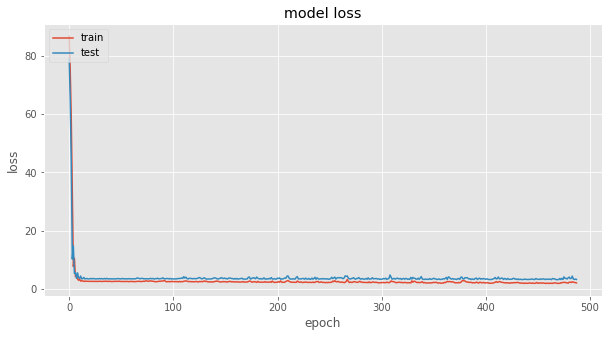

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# demonstrate prediction for next cycles
from tensorflow.keras.models import load_model
model100 = load_model('model103/')

x_input = np.array(list(dataset)[-80-1:])
temp_input=list(x_input)
lst_output=[]
i=0
cycles = last
while(i<cycles):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape((1, 2, 40, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, 2, 40, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    


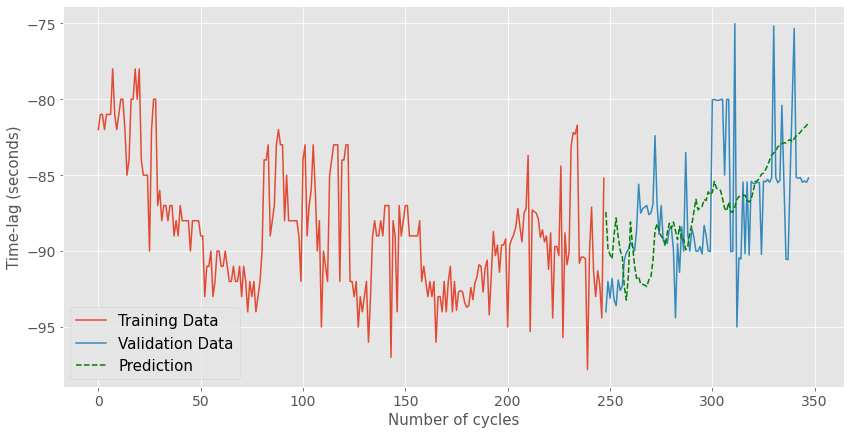

In [ ]:
new_cycle=np.arange(0,len(dataset)-last)
cycle_pred=np.arange(len(dataset)-last,len(dataset)-last+cycles)
plt.figure(figsize=(14,7))
plt.plot(new_cycle,list(dataset)[:len(dataset)-last], 
         label='Training Data')
plt.plot(np.arange(len(dataset)-last,len(dataset)), 
         list(dataset)[len(dataset)-last:], label='Validation Data', ls='-')
plt.plot(cycle_pred,lst_output, c='green', label='Prediction', ls='--')

plt.xlabel('Number of cycles', fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Time-lag (seconds)', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('/content/gdrive/My Drive/MASTER_data/CNN_LSTM_80_40_close_v1.png')

In [ ]:
from tensorflow.keras.metrics import mean_squared_error
print(f'RMSE {np.sqrt(mean_squared_error(list(dataset)[len(dataset)-last:], lst_output))}')
print(f'STD {np.std(np.array(list(dataset)[len(dataset)-last:]) - np.array(lst_output))}')
print(f'Correlation {np.corrcoef(np.array((np.array(list(dataset)[len(dataset)-last:]), np.array(lst_output))))[0, 1]}')
print(f'SAD {np.sum(np.abs(np.array((np.array(list(dataset)[len(dataset)-last:]) - np.array(lst_output)))))}')
print(f'SSD {np.sum(np.square(np.array((np.array(list(dataset)[len(dataset)-last:]) - np.array(lst_output)))))}')

RMSE 3.951495409011841
STD 3.9510061648899106
Correlation 0.42070050545106236
SAD 317.3453073730469
SSD 1561.4314018776588
